# Corey Austen - Homework 1 - Notebook 2

### Import standard packages for Machine Learning

In [2]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

### Check current directory

In [3]:
%pwd

'C:\\Users\\Corey\\Google Drive\\Corey - School\\Spring 2018 B\\BIA 6303 - Predictive Models\\HW_1'

### Change Directory to where my project is located

In [4]:
cd /Users/Corey/Google Drive/Corey - School/Spring 2018 B/BIA 6303 - Predictive Models/HW_1

C:\Users\Corey\Google Drive\Corey - School\Spring 2018 B\BIA 6303 - Predictive Models\HW_1


## 1. Read in the Churn Calls dataset. (500 obs, 2 class target). Call the dataframe Churn.

In [5]:
#Read in the Churn Calls dataset.
Churn = pd.read_csv("Churn_Calls.csv", sep=",")

In [6]:
#Shows the column names
Churn.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [7]:
#Looking at the data types
Churn.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## 2. Set the target variable as Churn (a yes/no variable). 

In [65]:
#Set the target variable as Churn (a yes/no variable). 
# designate target variable name
targetName = 'churn'
targetSeries = Churn[targetName]
#remove target from current location and insert in collum 0
del Churn[targetName]
Churn.insert(0, targetName, targetSeries)

,churn,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0,1,0,175.2,74,29.78,151.7,79,12.89,230.5,...,0,0,0,1,0,0,1,0,1,0
1,0,36,30,146.3,128,24.87,162.5,80,13.81,129.3,...,0,0,0,1,0,0,1,0,0,1
2,1,36,19,171.9,96,29.22,198.4,111,16.86,321.7,...,0,0,0,0,1,0,0,1,0,1
3,0,41,0,159.3,66,27.08,125.9,75,10.70,261.9,...,0,0,0,0,1,0,1,0,1,0
4,0,42,0,171.0,129,29.07,183.9,96,15.63,130.2,...,0,0,0,0,1,0,1,0,1,0
5,0,48,37,211.7,115,35.99,159.9,84,13.59,144.1,...,0,0,0,0,1,0,1,0,0,1
6,0,50,0,183.6,107,31.21,58.6,118,4.98,202.6,...,0,0,0,1,0,0,1,0,1,0
7,0,51,12,135.8,60,23.09,200.6,134,17.05,192.4,...,0,0,0,0,0,1,0,1,0,1
8,0,52,0,217.0,104,36.89,152.3,83,12.95,134.3,...,0,0,0,1,0,0,1,0,1,0
9,0,52,24,170.9,71,29.05,201.4,80,17.12,159.0,...,0,0,0,0,1,0,1,0,0,1


## 3. Perform some EDA so you get a feel for the data. Make comments on what you see and how it might affect your analysis. 

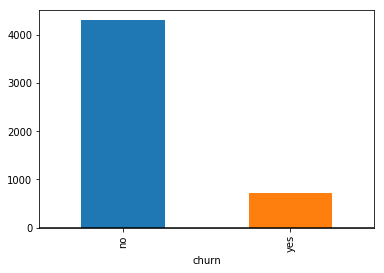

In [24]:
groupby = Churn.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

# Comments on EDA 
Looking at the distribution of target variables, the distribution is very uneven.  This means that the models may tend to show 85% - 86% accuracy, and although that looks good, it would mean that it only predicted "no" values since they comprise 85.86% of the data.  I'll have to make sure the models score higher than the 85% baseline to even consider the parameters.

In [25]:
#This Shows how the target is distributed in the data as a percentage of the total
print("Target Distribution as Percent of Total", Churn.groupby(targetName).size() * 100 / len(Churn))

Target Distribution as Percent of Total churn
no     85.86
yes    14.14
dtype: float64


## 4. Transform the data so factors are dummied and missing values (if any) are fixed.

In [27]:
# This code turns a text target into numeric to some scikit learn alogrythms can process it
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
Churn['churn'] = le_dep.fit_transform(Churn['churn'])

In [28]:
# perform data transformation. Creates dummies of any categorical feature
for col in Churn.columns[1:]:
	attName = col
	dType = Churn[col].dtype
	missing = pd.isnull(Churn[col]).any()
	uniqueCount = len(Churn[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Churn = pd.concat([Churn, pd.get_dummies(Churn[col], prefix=col)], axis=1)
		del Churn[attName]

## 5. Create a train and test sample of 70/30.

In [29]:
# split dataset into testing and training
features_train, features_test, target_train, target_test = train_test_split(
    Churn.iloc[:,1:].values, Churn.iloc[:,0].values, test_size=0.30, random_state=0)

## 6. Perform a basic decision tree. Alter at least 2 default arguments. Show your classification and confusion matrix.

In [62]:
#Decision Tree train model.
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,min_samples_split=3)
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [63]:
print("DT Accuracy Score", accuracy_score(target_test, target_predicted_dt))
print(classification_report(target_test, target_predicted_dt))
print(confusion_matrix(target_test, target_predicted_dt))

DT Accuracy Score 0.9273333333333333
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1285
          1       0.75      0.74      0.75       215

avg / total       0.93      0.93      0.93      1500

[[1231   54]
 [  55  160]]


## 7. Cross validate your decision tree. CV=5 or 10.

In [64]:
#verify DT with Cross Validation
scores = cross_val_score(clf_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()    

Cross Validation Score for each K [0.94017094 0.92877493 0.92285714 0.93142857 0.92571429 0.90571429
 0.94857143 0.94285714 0.92836676 0.90830946]


0.9282764943853771

# Comments on Decision Tree Model
This model did pretty well in terms of accuracy and recall.  The parameters that I chose to change were: criterion='entropy',min_samples_leaf=2,min_samples_split=3.  I tested the defaults and then used these parameters (increasing min samples of leaf and split by 1) and changing the function to entropy, which uses information gain to gauge the quality of each split.  The overall score went down about 1.5%, but looking at the cross validation, it appears that the variance  went down, which means it is less likely to be overfit.  The range is still 91-95%, so it may be overfit still, but it is not as bad as it was.

## 8. Perform a KNN=3. Show your classification and confusion matrix. 

In [38]:
#KNN train model. Change the name
from sklearn.neighbors import KNeighborsClassifier
churn_knn = KNeighborsClassifier(n_neighbors=3)
#Call up the model to see the parameters you can tune (and their default setting)
print(churn_knn)
#Fit clf to the training data
churn_knn = churn_knn.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_knn = churn_knn.predict(features_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [39]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print(classification_report(target_test, target_predicted_knn))
print(confusion_matrix(target_test, target_predicted_knn))

KNN Accuracy Score 0.8746666666666667
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1285
          1       0.61      0.35      0.45       215

avg / total       0.86      0.87      0.86      1500

[[1236   49]
 [ 139   76]]


## 9. Cross Validate your KNN. Comment on what this tells you.

In [40]:
#verify KNN with Cross Validation
scores = cross_val_score(churn_knn, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()    

Cross Validation Score for each K [0.86894587 0.86609687 0.86       0.88       0.86857143 0.87428571
 0.87714286 0.86857143 0.87106017 0.88538682]


0.8720061155018175

# Comments on KNN Model
Overall, this model didn't do too bad, but its not great either.  The accuracy was just barely above the baseline of 86% by 1%, so it did just slightly better than just guessing "no" everytime. You can see this in the Confusion Matrix: it scored very high on recall with "no," but was pretty pitiful with "yes."  This is a model I might tinker with the parameters a bit just to see if I could get a bit more out of it, but I wouldn't spend too much more time, as I have other models that perform better and can be more easily explained.

## 10. Perform a Naïve Bayes. Show your classification and confusion matrix.

In [41]:
#NB train model. Change the name
from sklearn.naive_bayes import MultinomialNB
churn_nb = MultinomialNB()
#Call up the model to see the parameters you can tune (and their default setting)
print(churn_nb)
#Fit clf to the training data
churn_nb = churn_nb.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_nb = churn_nb.predict(features_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [42]:
print("Naive Bayes Accuracy Score", accuracy_score(target_test, target_predicted_nb))
print(classification_report(target_test, target_predicted_nb))
print(confusion_matrix(target_test, target_predicted_nb))

Naive Bayes Accuracy Score 0.628
             precision    recall  f1-score   support

          0       0.91      0.63      0.74      1285
          1       0.22      0.60      0.32       215

avg / total       0.81      0.63      0.68      1500

[[812 473]
 [ 85 130]]


## 11. Cross validate your NB. Comment on what this tells you.

In [43]:
#verify Naive Bayes with Cross Validation
scores = cross_val_score(churn_nb, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()   

Cross Validation Score for each K [0.64387464 0.63247863 0.62       0.66       0.62571429 0.63142857
 0.61714286 0.64571429 0.61318052 0.6991404 ]


0.6388674193258721

# Comments on Naive Bayes
This model performed pretty badly.  The overall accuracy score was 62.8%, which is well below the baseline of 86%.  Looking at the cross validation isn't very promising either, because the range is 62%-70%, which would hint that it is overfit because the variance is so high. Definitely would not go with this model.

## 12. Optional- add a Random Forest.

In [59]:
from sklearn.ensemble import RandomForestClassifier
#create the classifier and tune the parameters (more on the documentations)
churn_rf = RandomForestClassifier(min_samples_leaf=2, min_samples_split=3,n_estimators= 20, max_depth= None,random_state=0 )
print(churn_rf)
#fit the data
churn_rf = churn_rf.fit(features_train, target_train)
#make the prediction on the unseen data
target_predicted_rf = churn_rf.predict(features_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [60]:
print("Random Forest Accuracy Score", accuracy_score(target_test, target_predicted_rf))
print(classification_report(target_test, target_predicted_rf))
print(confusion_matrix(target_test, target_predicted_rf))

Random Forest Accuracy Score 0.9413333333333334
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      1285
          1       0.91      0.66      0.76       215

avg / total       0.94      0.94      0.94      1500

[[1271   14]
 [  74  141]]


## Cross validate the Random Forest Model.

In [61]:
#verify Random Forest with Cross Validation
scores = cross_val_score(churn_rf, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()   

Cross Validation Score for each K [0.94871795 0.94586895 0.94       0.93714286 0.95714286 0.94
 0.93428571 0.92857143 0.9512894  0.93982808]


0.9422847230239781

# Comments on Random Forest
The random forest performed the best overall with an accuracy score of 94%.  However, it is pretty concerning that the recall score for "no" is 99%. The first time I ran this, I had the n_estimators set to 25 and I had a recall score of 100%, so I knew something was wrong.  In cross validation, this model also didn't do too bad, with a range of 92-96.  There is fairly good chance this model could be a bit overfit, but this does appear to be the best of all the attempted models.